In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('flip_one_bit_sim_exps_df_25_correct.csv')

In [4]:
df

,censoring_p_orig,exp_id,flipped_e_counter,flipped_e_idx,is_wrong_event_label,base_ci,new_ci,y_original,y_censored,y_diff,diff_from_base_ci
0,0.1,0.0,0.0,1.0,1.0,0.786494,0.785538,9.182127,7.637817,1.544309,-0.000956
1,0.1,0.0,1.0,2.0,0.0,0.786494,0.782599,0.334591,0.334591,0.000000,-0.003895
2,0.1,0.0,2.0,3.0,0.0,0.786494,0.786022,0.457397,0.457397,0.000000,-0.000472
3,0.1,0.0,3.0,4.0,1.0,0.786494,0.789533,16.274417,3.068869,13.205548,0.003039
4,0.1,0.0,4.0,6.0,1.0,0.786494,0.786290,118.190814,22.095598,96.095216,-0.000204
...,...,...,...,...,...,...,...,...,...,...,...
449995,0.9,999.0,5.0,46.0,0.0,0.872068,0.869074,18.737142,18.737142,0.000000,-0.002994
449996,0.9,999.0,6.0,49.0,1.0,0.872068,0.869347,1.537617,1.352591,0.185026,-0.002721
449997,0.9,999.0,7.0,51.0,1.0,0.872068,0.887872,50.333227,12.340823,37.992405,0.015804
449998,0.9,999.0,8.0,58.0,1.0,0.872068,0.884026,162.528651,63.005367,99.523284,0.011958


In [5]:
max_dfs = []
for i in range(1, 10):
    print(i)
    cp = i*0.1
    g = df[df['censoring_p_orig']==cp].groupby(['exp_id'])
    topn = int(g.get_group(0)['flipped_e_counter'].max())
    max_n_df = g.apply(lambda x: x.sort_values('diff_from_base_ci', ascending=False).head(topn).assign(order=list(range(1,topn+1)))).drop(columns='exp_id').reset_index()
    max_dfs.append(max_n_df)

1
2
3
4
5
6
7
8
9


In [7]:
pc_pps = dict()
for max_df in max_dfs:
    pps = []
    topn = max_df['order'].max()
    pc = max_df['censoring_p_orig'].max()
    for i in range(1, topn+1):
        pp = max_df.loc[(max_df['order']==i), 'is_wrong_event_label'].mean()
        print(f'Order {i} Percentage:',pp)
        pps.append(pp)
    pc_pps[pc] = pps

Order 1 Percentage: 0.877
Order 2 Percentage: 0.888
Order 3 Percentage: 0.86
Order 4 Percentage: 0.887
Order 5 Percentage: 0.869
Order 6 Percentage: 0.877
Order 7 Percentage: 0.865
Order 8 Percentage: 0.859
Order 9 Percentage: 0.869
Order 10 Percentage: 0.87
Order 11 Percentage: 0.852
Order 12 Percentage: 0.861
Order 13 Percentage: 0.874
Order 14 Percentage: 0.862
Order 15 Percentage: 0.833
Order 16 Percentage: 0.831
Order 17 Percentage: 0.838
Order 18 Percentage: 0.807
Order 19 Percentage: 0.839
Order 20 Percentage: 0.824
Order 21 Percentage: 0.821
Order 22 Percentage: 0.816
Order 23 Percentage: 0.796
Order 24 Percentage: 0.799
Order 25 Percentage: 0.808
Order 26 Percentage: 0.816
Order 27 Percentage: 0.811
Order 28 Percentage: 0.778
Order 29 Percentage: 0.782
Order 30 Percentage: 0.774
Order 31 Percentage: 0.759
Order 32 Percentage: 0.749
Order 33 Percentage: 0.739
Order 34 Percentage: 0.728
Order 35 Percentage: 0.722
Order 36 Percentage: 0.677
Order 37 Percentage: 0.676
Order 38 Per

Order 23 Percentage: 0.677
Order 24 Percentage: 0.693
Order 25 Percentage: 0.709
Order 26 Percentage: 0.679
Order 27 Percentage: 0.68
Order 28 Percentage: 0.711
Order 29 Percentage: 0.689
Order 30 Percentage: 0.708
Order 31 Percentage: 0.726
Order 32 Percentage: 0.695
Order 33 Percentage: 0.715
Order 34 Percentage: 0.724
Order 35 Percentage: 0.736
Order 36 Percentage: 0.725
Order 37 Percentage: 0.716
Order 38 Percentage: 0.724
Order 39 Percentage: 0.758
Order 1 Percentage: 0.864
Order 2 Percentage: 0.866
Order 3 Percentage: 0.85
Order 4 Percentage: 0.842
Order 5 Percentage: 0.834
Order 6 Percentage: 0.841
Order 7 Percentage: 0.809
Order 8 Percentage: 0.811
Order 9 Percentage: 0.771
Order 10 Percentage: 0.751
Order 11 Percentage: 0.731
Order 12 Percentage: 0.669
Order 13 Percentage: 0.663
Order 14 Percentage: 0.648
Order 15 Percentage: 0.649
Order 16 Percentage: 0.665
Order 17 Percentage: 0.653
Order 18 Percentage: 0.649
Order 19 Percentage: 0.642
Order 20 Percentage: 0.677
Order 21 Per

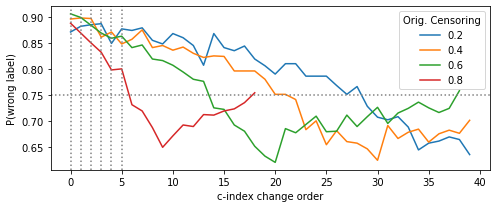

In [12]:
plt.figure(figsize=(7, 3))
for k in np.array(list(pc_pps.keys()))[1::2]:
    plt.plot(pc_pps[k][:40], label=f'{k:.1f}')
plt.axhline(0.75, c='gray', ls=':')
for i in range(6):
    plt.axvline(i, c='gray', ls=':')
plt.legend(title="Orig. Censoring")
plt.xlabel('c-index change order')
plt.ylabel('P(wrong label)')
plt.tight_layout()
plt.savefig(f'results/one_bit_flip/figs/one_bit_flip_correctly_labeled_p_25.pdf')

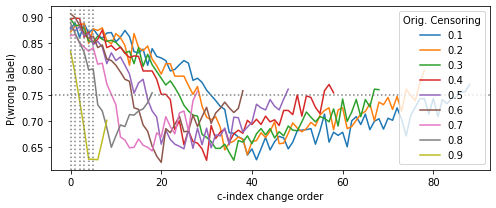

In [10]:
plt.figure(figsize=(7, 3))
for k in pc_pps:
    plt.plot(pc_pps[k], label=f'{k:.1f}')
plt.axhline(0.75, c='gray', ls=':')
for i in range(6):
    plt.axvline(i, c='gray', ls=':')
plt.legend(title="Orig. Censoring")
plt.xlabel('c-index change order')
plt.ylabel('P(wrong label)')
plt.tight_layout()
#plt.savefig(f'results/one_bit_flip/figs/one_bit_flip_correctly_labeled_p_25.pdf')

Text(0, 0.5, 'P(wrong label|change order)')

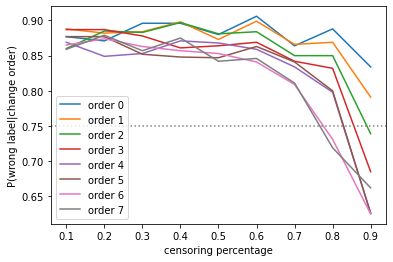

In [8]:
for order in range(8):
    pees = []
    tops = []
    for k in pc_pps:
        pees.append(k)
        tops.append(pc_pps[k][order])
    plt.plot(pees, tops, label=f'order {order}')
plt.axhline(0.75, c='gray', ls=':')
plt.legend()
plt.xlabel('censoring percentage')
plt.ylabel('P(wrong label|change order)')